In [1]:
import pandas
import fastavro
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
filepath = '/home/hadoopuser/ve472/songs_advanced.avro'
    # Open file stream
with open(filepath, "rb") as fp:
    # Configure Avro reader
    reader = fastavro.reader(fp)
    # Load records in memory
    records = [r for r in reader]
    # Populate pandas.DataFrame with records
    df = pandas.DataFrame.from_records(records)


In [3]:
dfcopy=df.copy()

In [4]:
df.isnull().sum().sort_values(ascending=False) 

artist_longitude                   642508
artist_latitude                    642508
song_hotness                       418035
artist_terms_weight_mean             3783
artist_terms_freq_mean               3783
bars_start_mean                      3664
sections_start_mean                  3656
beats_start_mean                     3230
tatums_start_mean                    2491
artist_familiarity                    185
artist_hotness                         12
time_signature                          0
segments_loudness_max_mean              0
segments_loudness_max_time_mean         0
loudness                                0
artist_7digitalid                       0
segments_confidence_mean                0
time_signature_confidence               0
duration                                0
tempo                                   0
track_7digitalid                        0
release_7digitalid                      0
segments_pitches_mean                   0
segments_start_mean               

In [5]:
df_zero = (df == 0)
zero_counts = df_zero.sum().sort_values(ascending=False)
print(zero_counts)

year                               484424
mode                               333592
end_of_fade_in                     311267
time_signature_confidence          204888
song_hotness                       124760
key                                122237
artist_hotness                      50528
bar_num                              3664
section_num                          3656
beat_num                             3230
tempo                                3230
artist_familiarity                   2548
tatum_num                            2491
time_signature                        619
artist_terms_freq_mean                108
loudness                                0
segments_confidence_mean                0
segments_loudness_max_mean              0
segments_loudness_max_time_mean         0
artist_7digitalid                       0
track_7digitalid                        0
release_7digitalid                      0
tatums_start_mean                       0
segments_pitches_mean             

In [6]:
dfcopy.head()

,loudness,segments_loudness_max_mean,segments_loudness_max_time_mean,artist_7digitalid,time_signature,time_signature_confidence,segments_confidence_mean,artist_familiarity,segments_pitches_mean,segments_start_mean,...,artist_name,artist_longitude,artist_latitude,artist_terms_weight_mean,artist_terms_freq_mean,song_id,title,album_id,album_name,year
0,-4.769,-6.529593,0.066309,324573,4.0,0.846,0.402875,0.639903,0.415574,98.248795,...,b'Adelitas Way',NaN,NaN,0.633156,0.660421,b'SOBLFFE12AF72AA5BA',b'Scream',497103,b'Adelitas Way',2009.0
1,-7.240,-8.838181,0.056362,173942,4.0,0.546,0.400524,0.671755,0.417309,58.676884,...,b'Western Addiction',-122.420052,37.779160,0.654697,0.538831,b'SOQPWCR12A6D4FB2A3',b'A Poor Recipe For Civic Cohesion',226813,b'Cognicide',2005.0
2,-11.197,-13.578341,0.058937,165270,4.0,0.778,0.696677,0.581794,0.365252,108.114021,...,b'Casual',NaN,NaN,0.681588,0.563869,b'SOMZWCG12A8C13C480',"b""I Didn't Mean To""",300848,b'Fear Itself',0.0
3,-13.179,-16.236767,0.084964,95162,4.0,0.000,0.491027,0.476941,0.209029,102.686424,...,b'Alquimia',-101.956253,23.625740,0.767031,0.647616,b'SOJDASC12A8C13EB49',b'The Lark In The Clear Air',120502,b'Forever',0.0
4,-9.843,-12.450609,0.054163,1998,4.0,0.384,0.698873,0.630630,0.296259,72.893227,...,b'The Box Tops',-90.048920,35.149681,0.671166,0.646709,b'SOCIWDW12A8C13D406',b'Soul Deep',300822,b'Dimensions',1969.0


In [7]:
dfcopy.describe()

,loudness,segments_loudness_max_mean,segments_loudness_max_time_mean,artist_7digitalid,time_signature,time_signature_confidence,segments_confidence_mean,artist_familiarity,segments_pitches_mean,segments_start_mean,...,end_of_fade_in,mode,start_of_fade_out,tatum_num,artist_longitude,artist_latitude,artist_terms_weight_mean,artist_terms_freq_mean,album_id,year
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,999815.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,357492.000000,357492.000000,996217.000000,996217.000000,1000000.000000,1000000.000000
mean,-10.124039,-13.284075,0.061805,125680.834861,3.593947,0.515916,0.552086,0.557203,0.355671,121.651791,...,0.819850,0.666408,240.625024,1103.967241,-58.370804,38.999425,0.699809,0.630914,379884.834575,1030.325652
std,5.197245,6.086152,0.116320,144995.406715,1.221925,0.371903,0.135860,0.138611,0.069919,63.606277,...,3.304457,0.471496,124.079924,640.947844,54.955556,15.196324,0.098250,0.132817,237443.651689,998.745002
min,-58.178001,-58.253860,0.007450,-1.000000,0.000000,0.000000,0.014750,0.000000,0.094825,0.066393,...,0.000000,0.000000,0.313000,0.000000,-162.436493,-53.099998,0.310760,0.000000,-1.000000,0.000000
25%,-12.672000,-16.363730,0.047161,15609.000000,3.000000,0.125000,0.459823,0.478253,0.304775,87.025167,...,0.000000,0.000000,173.179993,703.000000,-91.523819,34.072151,0.656094,0.573158,179685.000000,0.000000
50%,-8.963000,-12.081990,0.056140,62827.000000,4.000000,0.557000,0.558238,0.558905,0.354576,110.782753,...,0.194000,1.000000,219.759003,989.000000,-77.366920,40.655071,0.716541,0.656440,350853.000000,1969.000000
75%,-6.386000,-8.890419,0.067401,185599.000000,4.000000,0.869000,0.649499,0.641420,0.404511,141.619305,...,0.432000,1.000000,279.713013,1377.000000,-2.232180,47.603561,0.763395,0.718813,582854.750000,2002.000000
max,4.318000,3.995522,42.445358,817066.000000,7.000000,1.000000,1.000000,1.000000,0.918806,2349.931152,...,1163.941040,1.000000,3030.622070,23771.000000,178.690964,70.695763,1.000000,1.000000,823654.000000,2011.000000


In [8]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 40 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   loudness                         1000000 non-null  float64
 1   segments_loudness_max_mean       1000000 non-null  float64
 2   segments_loudness_max_time_mean  1000000 non-null  float64
 3   artist_7digitalid                1000000 non-null  int64  
 4   time_signature                   1000000 non-null  float64
 5   time_signature_confidence        1000000 non-null  float64
 6   segments_confidence_mean         1000000 non-null  float64
 7   artist_familiarity               999815 non-null   float64
 8   segments_pitches_mean            1000000 non-null  float64
 9   segments_start_mean              1000000 non-null  float64
 10  bars_start_mean                  996336 non-null   float64
 11  beats_start_mean                 996770 non-null   

In [9]:
df.select_dtypes(include=[object]).columns

Index(['artist_id', 'artist_name', 'song_id', 'title', 'album_name'], dtype='object')

In [10]:
df = df[df['year'] != 0]

In [11]:
df_num = df.select_dtypes(include=[float, int])

In [12]:
df_num.head()

,loudness,segments_loudness_max_mean,segments_loudness_max_time_mean,artist_7digitalid,time_signature,time_signature_confidence,segments_confidence_mean,artist_familiarity,segments_pitches_mean,segments_start_mean,...,end_of_fade_in,mode,start_of_fade_out,tatum_num,artist_longitude,artist_latitude,artist_terms_weight_mean,artist_terms_freq_mean,album_id,year
0,-4.769,-6.529593,0.066309,324573,4.0,0.846,0.402875,0.639903,0.415574,98.248795,...,0.000,1.0,210.048004,1399.0,NaN,NaN,0.633156,0.660421,497103,2009.0
1,-7.240,-8.838181,0.056362,173942,4.0,0.546,0.400524,0.671755,0.417309,58.676884,...,0.264,1.0,115.141998,486.0,-122.420052,37.779160,0.654697,0.538831,226813,2005.0
4,-9.843,-12.450609,0.054163,1998,4.0,0.384,0.698873,0.630630,0.296259,72.893227,...,0.148,0.0,137.914993,591.0,-90.048920,35.149681,0.671166,0.646709,300822,1969.0
7,-13.225,-16.018423,0.058375,52181,1.0,0.000,0.559739,0.627828,0.293020,195.032837,...,0.499,1.0,386.727997,1756.0,-122.420052,37.779160,0.747361,0.739806,244077,1970.0
8,-14.567,-18.145113,0.089001,18514,3.0,0.774,0.408490,0.421796,0.338018,79.629616,...,0.189,1.0,153.826004,504.0,-0.127140,51.506321,0.758395,0.673531,809034,2003.0


In [13]:
# replace missing values with the mean of a column
df_num = df_num.fillna(df_num.mean())
# standardize the columns
df_num = (df_num - df_num.mean()) / df_num.std()

In [14]:
df_num.describe()

,loudness,segments_loudness_max_mean,segments_loudness_max_time_mean,artist_7digitalid,time_signature,time_signature_confidence,segments_confidence_mean,artist_familiarity,segments_pitches_mean,segments_start_mean,...,end_of_fade_in,mode,start_of_fade_out,tatum_num,artist_longitude,artist_latitude,artist_terms_weight_mean,artist_terms_freq_mean,album_id,year
count,5.155760e+05,5.155760e+05,5.155760e+05,5.155760e+05,5.155760e+05,5.155760e+05,5.155760e+05,5.155760e+05,5.155760e+05,5.155760e+05,...,5.155760e+05,5.155760e+05,5.155760e+05,5.155760e+05,5.155760e+05,5.155760e+05,5.155760e+05,5.155760e+05,5.155760e+05,5.155760e+05
mean,4.437653e-18,-2.180238e-17,-5.209419e-18,-5.311403e-17,1.653784e-18,1.827431e-17,1.045054e-16,4.457292e-16,-1.956426e-16,-1.488406e-17,...,-1.041884e-17,9.740787e-17,1.812272e-17,-6.932111e-17,-4.679795e-16,2.210020e-15,2.535251e-16,4.426628e-17,2.017616e-17,-4.489913e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.571603e+00,-7.672258e+00,-4.420070e-01,-7.987298e-01,-3.007755e+00,-1.392062e+00,-3.794562e+00,-4.798057e+00,-3.741935e+00,-2.066660e+00,...,-2.485407e-01,-1.404148e+00,-2.095717e+00,-1.813143e+00,-3.110382e+00,-9.672854e+00,-3.641518e+00,-4.983258e+00,-1.526759e+00,-6.989341e+00
25%,-5.010965e-01,-5.194293e-01,-1.238464e-01,-7.125954e-01,-5.120660e-01,-1.041611e+00,-6.942864e-01,-6.494411e-01,-7.291023e-01,-5.528624e-01,...,-2.485407e-01,-1.404148e+00,-5.513605e-01,-6.295614e-01,-2.101289e-16,2.247826e-15,-4.479448e-01,-4.372290e-01,-8.464986e-01,-4.022890e-01
50%,2.196391e-01,1.887716e-01,-4.970952e-02,-4.676797e-01,3.198303e-01,1.094840e-01,2.821135e-02,-2.179346e-02,-1.151603e-02,-1.553752e-01,...,-1.928469e-01,7.121740e-01,-1.515172e-01,-1.764844e-01,-2.101289e-16,2.247826e-15,2.112695e-01,2.170655e-01,-1.931666e-01,3.296057e-01
75%,7.226570e-01,7.266994e-01,4.405110e-02,4.163517e-01,3.198303e-01,9.478694e-01,7.192114e-01,6.394830e-01,6.992502e-01,3.419498e-01,...,-1.245863e-01,7.121740e-01,3.435441e-01,4.292600e-01,-2.101289e-16,2.247826e-15,6.948245e-01,6.981410e-01,8.316100e-01,6.955531e-01
max,2.802310e+00,2.798136e+00,3.662940e+02,5.273014e+00,2.815519e+00,1.303712e+00,3.452352e+00,3.221809e+00,8.014197e+00,3.842281e+01,...,2.828928e+02,7.121740e-01,2.455216e+01,3.177858e+01,6.892143e+00,3.244523e+00,3.152629e+00,2.900968e+00,1.975275e+00,1.152987e+00


In [15]:
df_num.corr()['year'].sort_values(ascending=False)

year                               1.000000
loudness                           0.272819
segments_loudness_max_mean         0.235492
artist_7digitalid                  0.205400
album_id                           0.111313
release_7digitalid                 0.111313
track_7digitalid                   0.109126
time_signature_confidence          0.108923
time_signature                     0.085411
song_hotness                       0.073320
tatum_num                          0.068303
segment_num                        0.063951
artist_longitude                   0.052525
start_of_fade_out                  0.052466
duration                           0.052289
beat_num                           0.049961
beats_start_mean                   0.049771
tatums_start_mean                  0.049592
bars_start_mean                    0.049169
segments_pitches_mean              0.048998
segments_start_mean                0.042455
sections_start_mean                0.041984
artist_familiarity              

In [16]:
df_num.corr()['song_hotness'].sort_values(ascending=False)

song_hotness                       1.000000
artist_familiarity                 0.372040
artist_hotness                     0.341801
loudness                           0.126503
segments_loudness_max_mean         0.116049
year                               0.073320
artist_latitude                    0.030039
segments_pitches_mean              0.029319
tempo                              0.025351
time_signature                     0.020844
time_signature_confidence          0.015928
artist_longitude                   0.008912
tatum_num                          0.007802
beat_num                           0.004667
key                                0.000029
end_of_fade_in                    -0.002034
segments_loudness_max_time_mean   -0.003744
tatums_start_mean                 -0.008085
duration                          -0.008193
beats_start_mean                  -0.008256
start_of_fade_out                 -0.008356
bars_start_mean                   -0.008477
bar_num                         

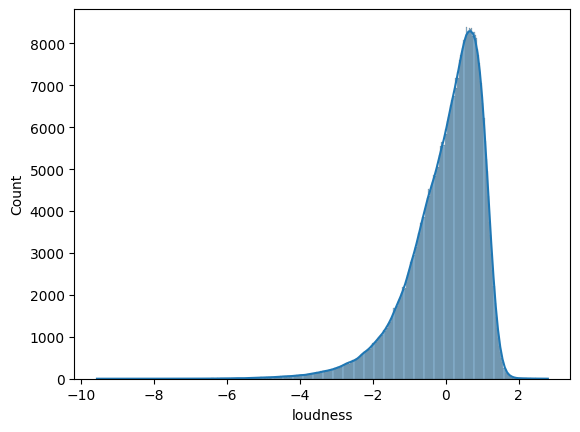

In [17]:
sns.histplot(df_num.loudness, kde=True)
plt.show()

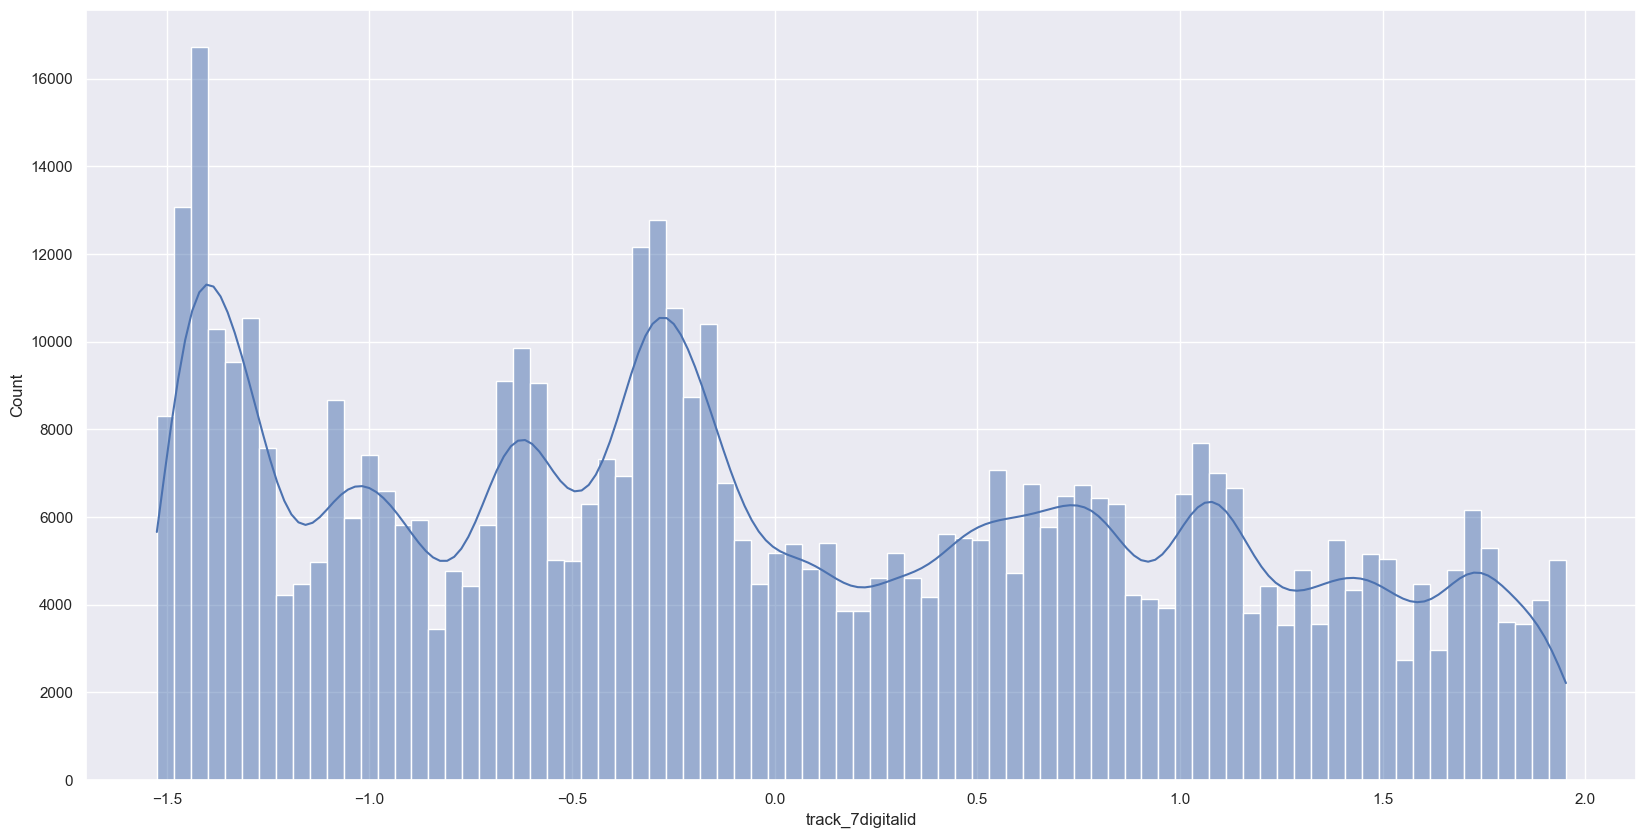

In [47]:
sns.histplot(df_num.track_7digitalid, kde=True)
plt.show()

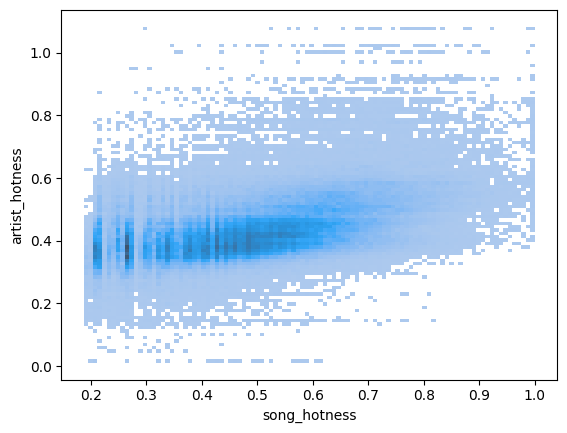

In [18]:
import matplotlib

df1=df[df['song_hotness'] != 0]
df2=df1[df1['artist_hotness'] != 0]
plt1 = sns.histplot(data=df2, x=df2.song_hotness, y=df2.artist_hotness, bins=100)

In [19]:
df_hot = df[df['song_hotness'] != 0]

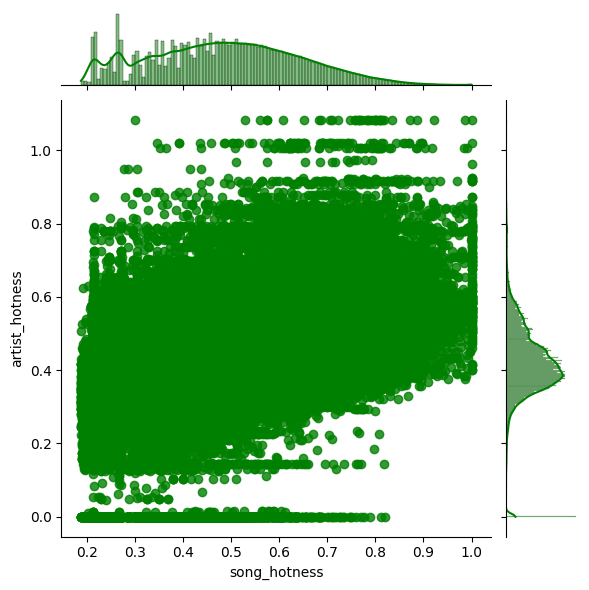

In [20]:
sns.jointplot(data=df_hot, x='song_hotness', y='artist_hotness', kind='reg', color='g')
plt.show()

In [39]:
from copy import copy
import palettable
import numpy as np

plt.style.use('ggplot')

my_cmap = copy(plt.cm.seismic)
my_cmap.set_over("white")
my_cmap.set_under("white")

dcorr = df_num.corr()

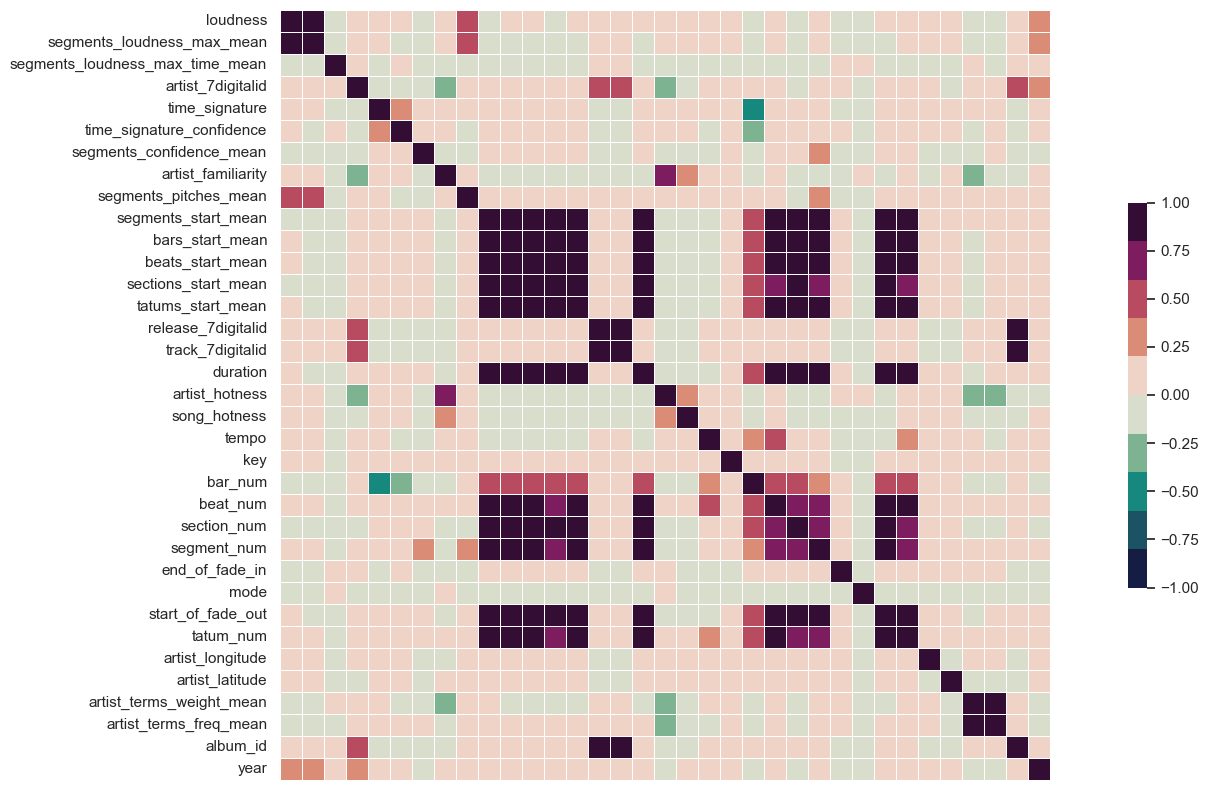

In [45]:
# Setting the figure size
sns.set_theme(rc = {'figure.figsize':(20,10)})

# Setting the font size by 2.5 
sns.set_theme(font_scale=1)

plot = sns.heatmap(data = dcorr, 
            facecolor='white',
            vmin=-1, vmax=1,
            xticklabels=False,
            yticklabels=True,
            cmap=palettable.cmocean.diverging.Curl_10.mpl_colors,
            # mask=np.triu(np.ones_like(dcorr,dtype=np.bool)),#显示下面部分图
            square=True, linewidths=.5,#每个方格外框显示，外框宽度设置
            cbar_kws={"shrink": .5},
            annot_kws={
                "size": 9
                , "family": "serif"
                , "weight": "light"}
            )

ax = plot.axes

ax.grid(False)


plt.show()

In [22]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [23]:
dfcopy['year'].value_counts()

year
0.0       484424
2007.0     39414
2006.0     37546
2005.0     34960
2008.0     34770
           ...  
1925.0         7
1922.0         6
1933.0         6
1924.0         5
2011.0         1
Name: count, Length: 90, dtype: int64

In [24]:
dfcopy.isnull().sum().sort_values(ascending=False) 

artist_longitude                   642508
artist_latitude                    642508
song_hotness                       418035
artist_terms_weight_mean             3783
artist_terms_freq_mean               3783
bars_start_mean                      3664
sections_start_mean                  3656
beats_start_mean                     3230
tatums_start_mean                    2491
artist_familiarity                    185
artist_hotness                         12
time_signature                          0
segments_loudness_max_mean              0
segments_loudness_max_time_mean         0
loudness                                0
artist_7digitalid                       0
segments_confidence_mean                0
time_signature_confidence               0
duration                                0
tempo                                   0
track_7digitalid                        0
release_7digitalid                      0
segments_pitches_mean                   0
segments_start_mean               

In [25]:
df1 = df
df = dfcopy

In [26]:
# Selecting the relevant features for clustering
features = [
    'loudness', 'segments_loudness_max_mean', 'segments_loudness_max_time_mean',
    'time_signature', 'time_signature_confidence', 'segments_confidence_mean',
    'segments_pitches_mean', 'segments_start_mean', 'bars_start_mean',
    'beats_start_mean', 'sections_start_mean', 'tatums_start_mean',
    'tempo', 'key', 'mode', 'end_of_fade_in', 'start_of_fade_out',
    'duration', 'artist_familiarity', 'artist_hotness', 'song_hotness',
    'artist_longitude', 'artist_latitude'
]

# Check for missing values
print(df[features].isnull().sum())

loudness                                0
segments_loudness_max_mean              0
segments_loudness_max_time_mean         0
time_signature                          0
time_signature_confidence               0
segments_confidence_mean                0
segments_pitches_mean                   0
segments_start_mean                     0
bars_start_mean                      3664
beats_start_mean                     3230
sections_start_mean                  3656
tatums_start_mean                    2491
tempo                                   0
key                                     0
mode                                    0
end_of_fade_in                          0
start_of_fade_out                       0
duration                                0
artist_familiarity                    185
artist_hotness                         12
song_hotness                       418035
artist_longitude                   642508
artist_latitude                    642508
dtype: int64


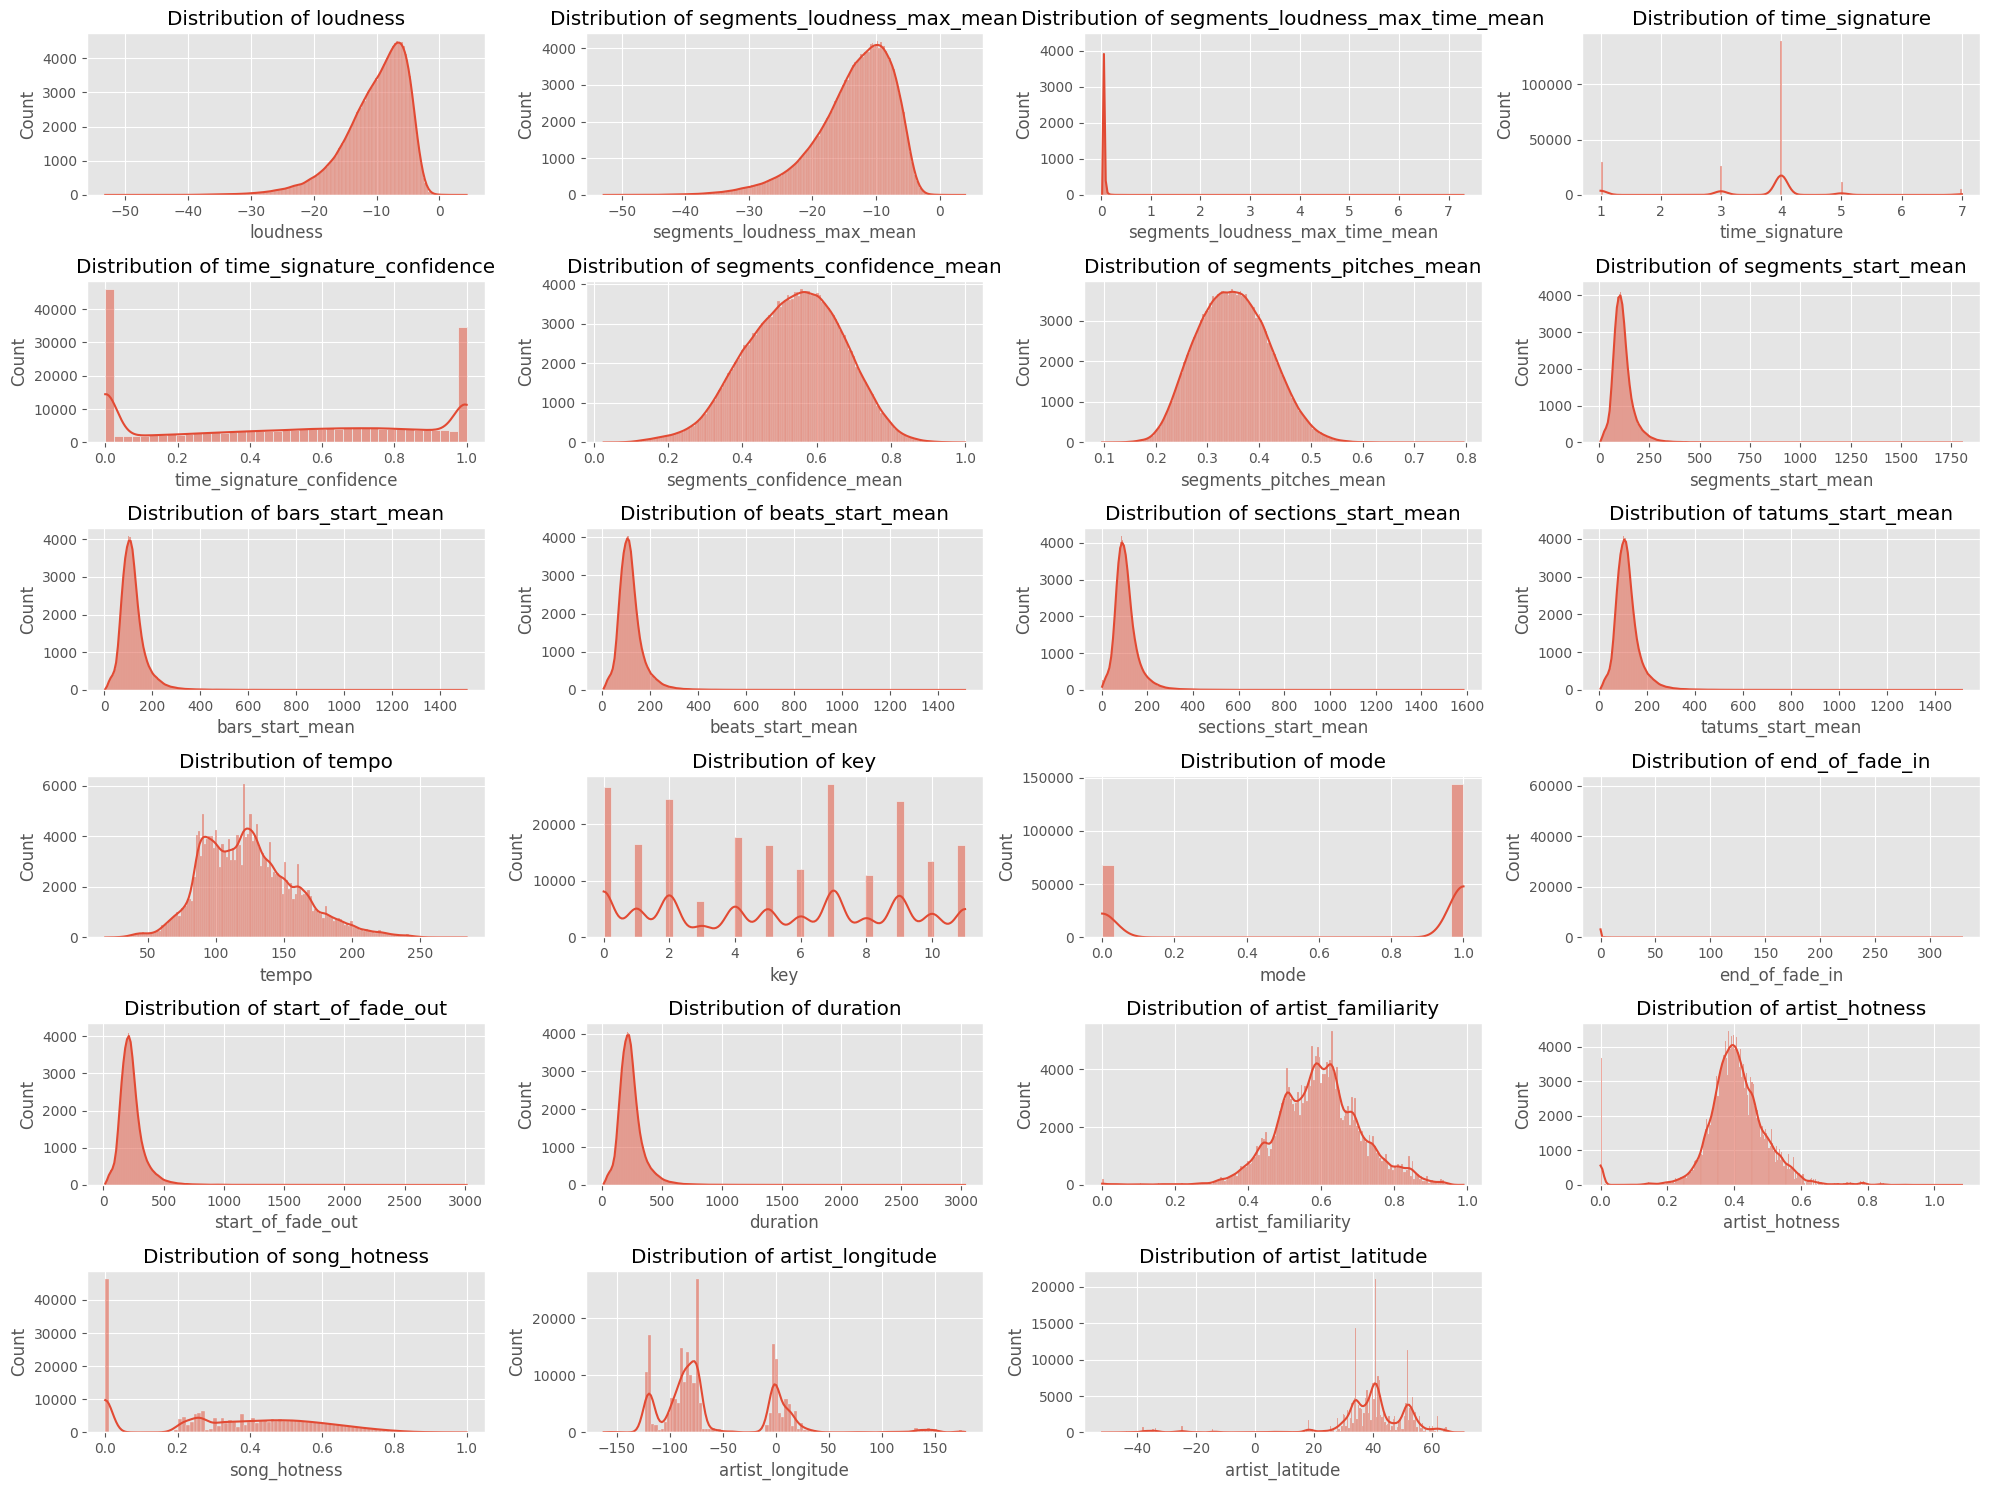

In [27]:
# Fill or drop missing values if necessary
df = df[features].dropna()

# Plot the distribution of features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(6, 4, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
# plt.savefig("overview.svg")
plt.show()


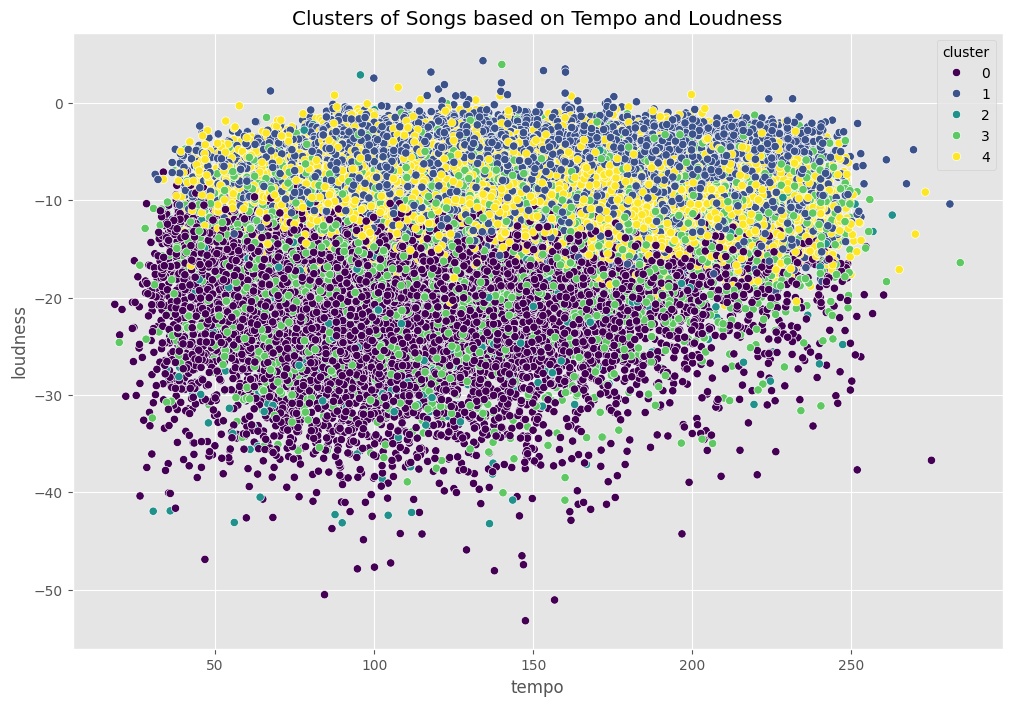

In [28]:
# Standardize the features before clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

# Perform clustering using KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Add the cluster labels to the dataframe
df['cluster'] = clusters

# Analyze the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='tempo', y='loudness', hue='cluster', palette='viridis')
plt.title('Clusters of Songs based on Tempo and Loudness')
plt.show()


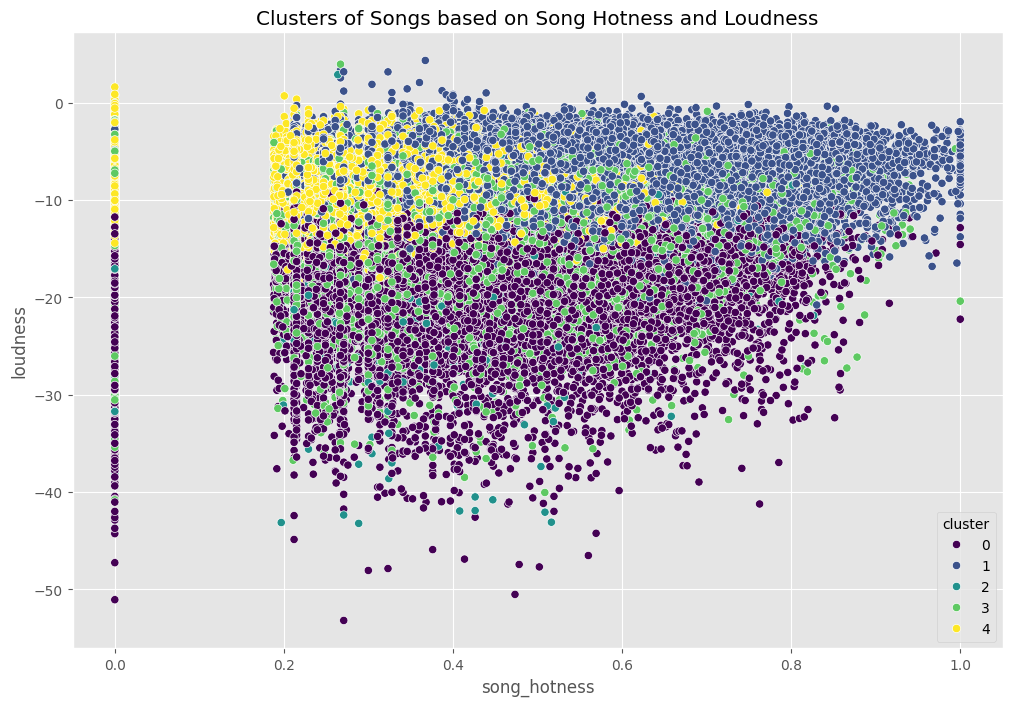

In [29]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='song_hotness', y='loudness', hue='cluster', palette='viridis')
plt.title('Clusters of Songs based on Song Hotness and Loudness')
plt.show()

In [30]:
df = dfcopy

In [31]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import geodatasets

# Assuming the dataframe is named df and contains the relevant columns
# Load your data into a pandas dataframe
# df = pd.read_csv('your_dataset.csv')

df = dfcopy

# Filter the dataframe for relevant columns
geo_df = df[['artist_latitude', 'artist_longitude', 'song_hotness']].dropna()

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(
    geo_df, 
    geometry=gpd.points_from_xy(geo_df.artist_longitude, geo_df.artist_latitude)
)

# Create a world map
earth_file = geodatasets.get_path("naturalearthland")
world = gpd.read_file(earth_file)


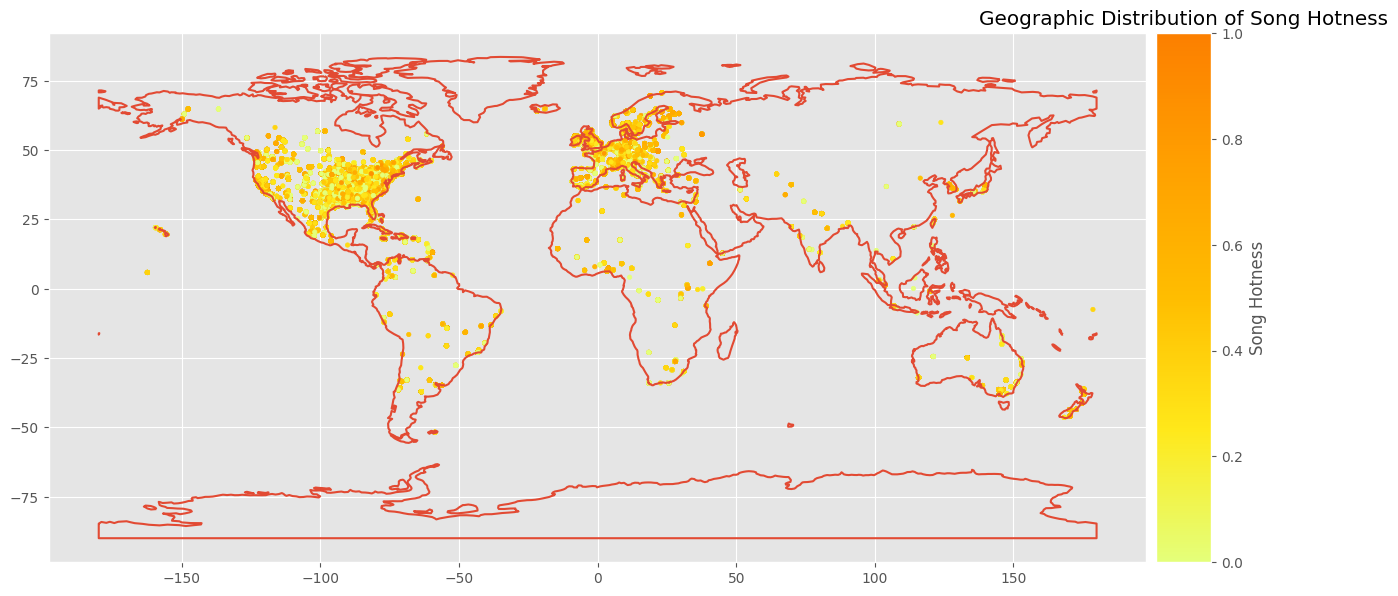

In [32]:
import mplcyberpunk
# Plot the world map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)

# Create a scatter plot of song hotness on the map
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

sc = gdf.plot(
    ax=ax, 
    column='song_hotness', 
    cmap=plt.cm.Wistia,
    legend=True, 
    cax=cax,
    markersize=10,
    legend_kwds={'label': "Song Hotness"}
)

plt.title('Geographic Distribution of Song Hotness')
plt.show()

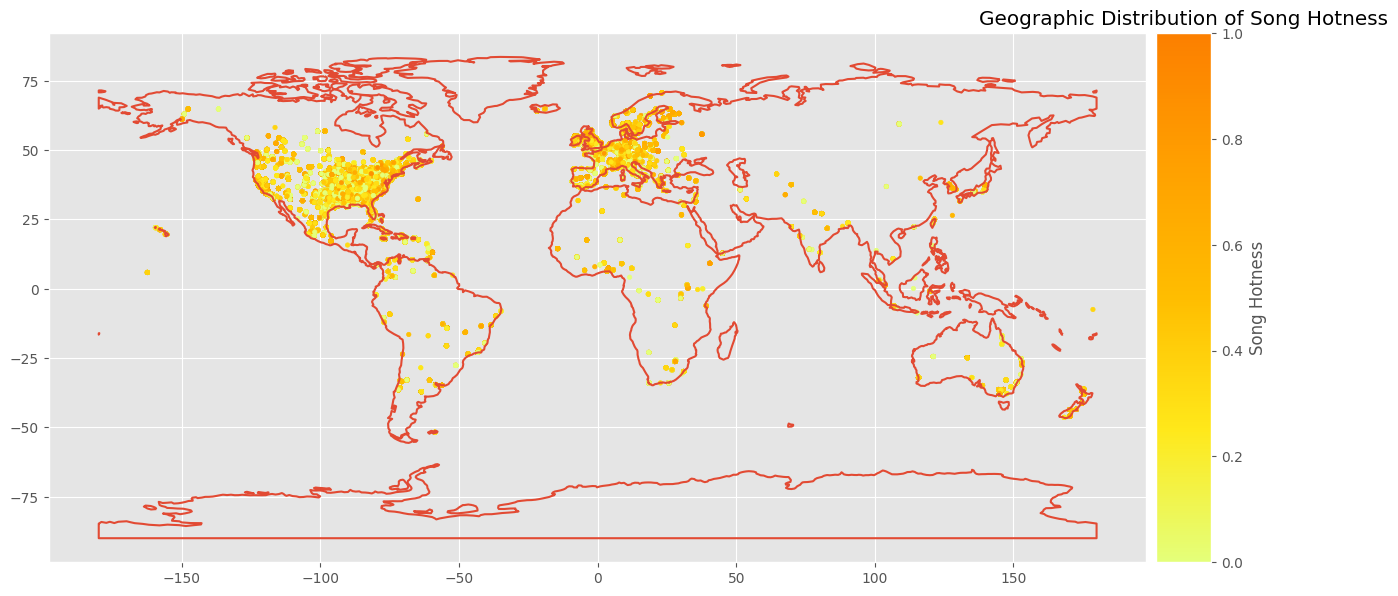

In [33]:
# Plot the world map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)

# Create a scatter plot of song hotness on the map
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

sc = gdf.plot(
    ax=ax, 
    column='song_hotness', 
    cmap=plt.cm.Wistia,
    legend=True, 
    cax=cax,
    markersize=10,
    legend_kwds={'label': "Song Hotness"}
)

mplcyberpunk.make_scatter_glow(ax=ax)


plt.title('Geographic Distribution of Song Hotness')
plt.show()

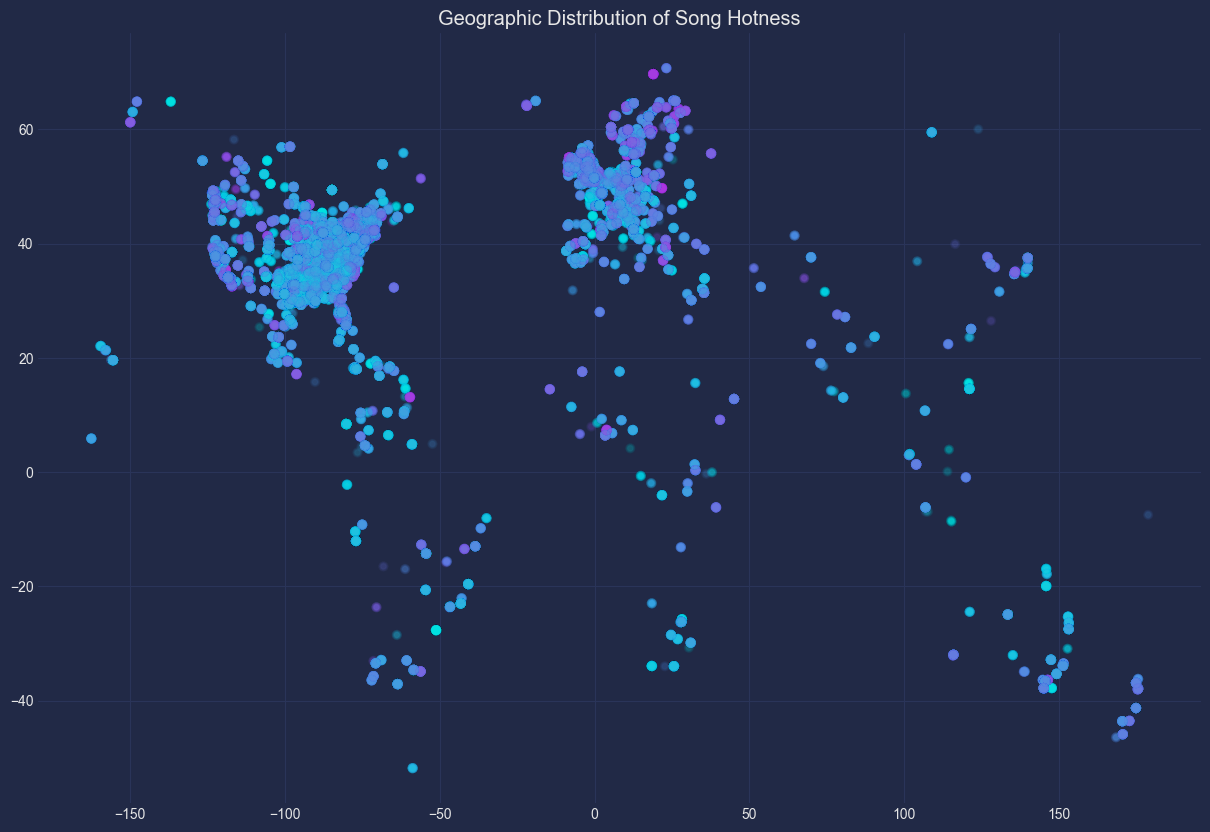

In [34]:
plt.style.use('cyberpunk')
plt.figure(figsize=(15, 10))

world.boundary.plot(ax=ax)

# Create a scatter plot of song hotness on the map
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

sc = gdf.plot(
    ax=ax, 
    column='song_hotness', 
    cmap=plt.cm.Wistia,
    legend=True, 
    cax=cax,
    markersize=10,
    legend_kwds={'label': "Song Hotness"}
)

mplcyberpunk.make_scatter_glow(ax=ax)

plt.title('Geographic Distribution of Song Hotness')
plt.show()


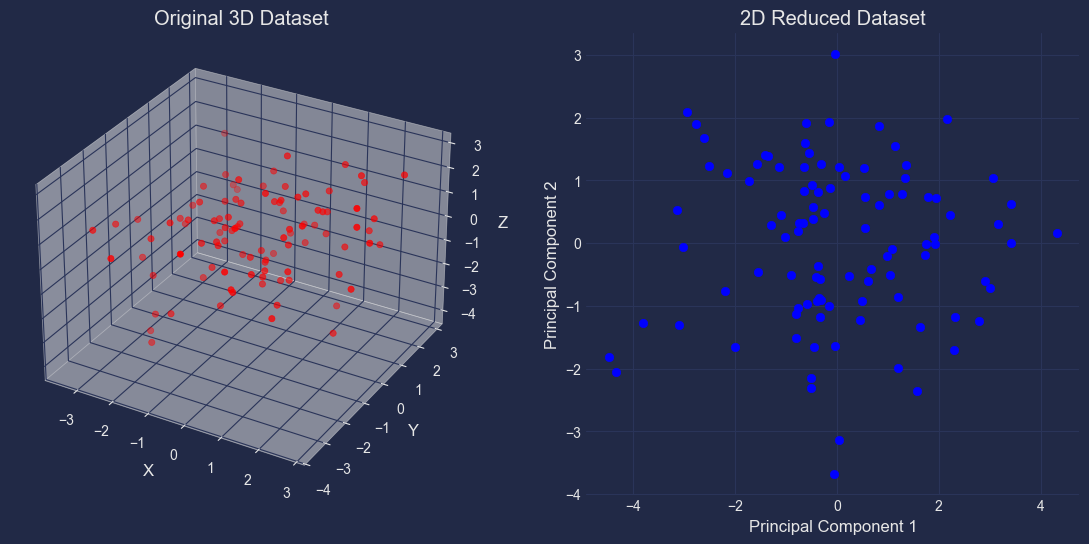

Explained variance ratio by PCA components: [0.52719593 0.27769047]


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Generate a 3D dataset
np.random.seed(42)
mean = [0, 0, 0]
cov = [[3, 1, 1], [1, 2, 1], [1, 1, 2]]
data = np.random.multivariate_normal(mean, cov, 100)

# Apply PCA to reduce the dataset to 2D
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

# Visualize the original 3D dataset
fig = plt.figure(figsize=(14, 6))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='r', marker='o')
ax.set_title('Original 3D Dataset')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Visualize the 2D reduced dataset
ax = fig.add_subplot(122)
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], c='b', marker='o')
ax.set_title('2D Reduced Dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

plt.show()

# Print the explained variance ratio
print("Explained variance ratio by PCA components:", pca.explained_variance_ratio_)


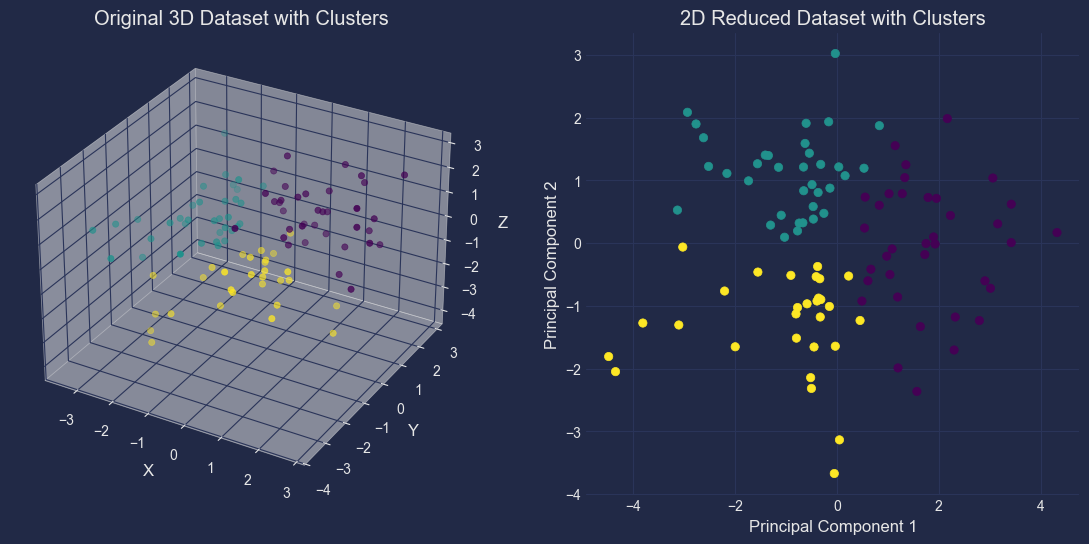

Explained variance ratio by PCA components: [0.52719593 0.27769047]


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# Generate a 3D dataset
np.random.seed(42)
mean = [0, 0, 0]
cov = [[3, 1, 1], [1, 2, 1], [1, 1, 2]]
data = np.random.multivariate_normal(mean, cov, 100)

# Apply PCA to reduce the dataset to 2D
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

# Perform KMeans clustering on the reduced dataset
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(reduced_data)

# Visualize the original 3D dataset with cluster colors
fig = plt.figure(figsize=(14, 6))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=clusters, cmap='viridis', marker='o')
ax.set_title('Original 3D Dataset with Clusters')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Visualize the 2D reduced dataset with cluster colors
ax = fig.add_subplot(122)
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', marker='o')
ax.set_title('2D Reduced Dataset with Clusters')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

plt.show()

# Print the explained variance ratio
print("Explained variance ratio by PCA components:", pca.explained_variance_ratio_)


In [37]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame containing the Million Songs Dataset
# Select features to be standardized
features_to_standardize = [
    'loudness', 'segments_loudness_max_mean', 'segments_loudness_max_time_mean',
    'artist_familiarity', 'duration', 'artist_hotness', 'song_hotness', 'tempo'
]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected features
df[features_to_standardize] = scaler.fit_transform(df[features_to_standardize])

# Now 'df' has standardized features
print(df.head())
print(df.describe())

   loudness  segments_loudness_max_mean  segments_loudness_max_time_mean  \
0  1.030362                    1.109812                         0.038721   
1  0.554917                    0.730494                        -0.046794   
2 -0.206448                   -0.048350                        -0.024663   
3 -0.587804                   -0.485149                         0.199097   
4  0.054075                    0.136945                        -0.065704   

   artist_7digitalid  time_signature  time_signature_confidence  \
0             324573             4.0                      0.846   
1             173942             4.0                      0.546   
2             165270             4.0                      0.778   
3              95162             4.0                      0.000   
4               1998             4.0                      0.384   

   segments_confidence_mean  artist_familiarity  segments_pitches_mean  \
0                  0.402875            0.596630               0.41

KeyboardInterrupt: 

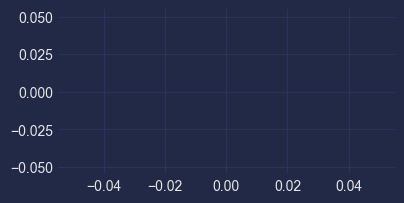

In [38]:
# Plot the distribution of features
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(6, 4, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()